In [1]:
from matplotlib import pyplot as plt
import random
import numpy as np

In [2]:
def fitness(a, b, c):
    nparray_x = np.genfromtxt('x_train.csv', delimiter = ',')
    nparray_y = np.genfromtxt('y_train.csv', delimiter = ',')
    lossSum = 0
    for i in range (0,1000):
        x = nparray_x[i]
        y = nparray_y[i]
        yprime = (x**2) * a + x * b + c
        loss = yprime - y
        lossSum = lossSum + (loss**2)
    return lossSum

In [3]:
def init_population():
    population = []
    for i in range(1, 41):
        population.append(init_individuals())
    # making the initial population made of random individuals.
    return population

In [4]:
def init_individuals():
    arr = []
    for i in range(1,4):
        arr.append(random.random()* 50 * random.choice([-1, 1])) 
    # making the random numbers for the function coefficients.
    return arr

In [5]:
def sort_population(population): #quick sort:
    quickSort(population, 0, len(population)-1)
    return population
        
# reference : geeksforgeeks : https://www.geeksforgeeks.org/quick-sort/
def partition(arr,low,high): 
    i = ( low-1 )         # index of smaller element 
    pivot = fitness(arr[high][0], arr[high][1], arr[high][2])     # pivot # modified section to get the fitness function
  
    for j in range(low , high): 
  
        # If current element is smaller than the pivot 
        if   fitness(arr[j][0], arr[j][1], arr[j][2]) < pivot: 
          
            # increment index of smaller element 
            i = i+1 
            arr[i],arr[j] = arr[j],arr[i] 
  
    arr[i+1],arr[high] = arr[high],arr[i+1] 
    return ( i+1 ) 

# reference : geeksforgeeks : https://www.geeksforgeeks.org/quick-sort/
def quickSort(arr,low,high): 
    if low < high: 
  
        # pi is partitioning index, arr[p] is now 
        # at right place 
        pi = partition(arr,low,high) 
  
        # Separately sort elements before 
        # partition and after partition 
        quickSort(arr, low, pi-1) 
        quickSort(arr, pi+1, high) 

In [6]:
def producing(newpopulation):
    temppop = newpopulation[0:20]
    for i in range(10):
        
        
        index1 = random.randint(0,19)
        index2 = random.randint(0,19)
        while (index1 > index2):
            index2 = random.randint(0,19)
        #print('index1 = ', index1)
        #print('index2 = ', index2)
        a_length = 3
        b_length = 3
        c_length = 0
        binarrayLen = a_length + b_length + c_length + 21
        # 21 is the size of the whole numbers in the float number which is constant
        
        array1 = abcarray(newpopulation[index1], a_length, b_length, c_length)
        array2 = abcarray(newpopulation[index2], a_length, b_length, c_length)
        
        newarray1, newarray2 = crossover(array1, array2, binarrayLen)
        # mutate for newarray1 :
        newarray1 = mutate(newarray1)
        # mutate for newarray2 :
        newarray2 = mutate(newarray2)
        individual1 = get_individual(newarray1, a_length, b_length, c_length, binarrayLen)
        individual2 = get_individual(newarray2, a_length, b_length, c_length, binarrayLen)
        temppop.append(individual1)
        temppop.append(individual2)
    return temppop

def mutate(array):
    # mutate for newarray :
    length = len(array)
    if(random.random() < 0.2):
        numberofBits = 2
        bfindex = set()
        for j in range(numberofBits):
            mindex = random.randint(0,length - 1)
            while(mindex in bfindex):
                mindex = random.randint(0,length - 1)
            bfindex.add(mindex)
            array[mindex] = array[mindex]^1
    return array

def crossover(array1, array2, binarrayLen):
    numberofBits = random.randint(1, binarrayLen//2)
    bfindex = set()
    newarray1 = array1[0:binarrayLen]
    newarray2 = array2[0:binarrayLen]
    for j in range(numberofBits):
        coindex = random.randint(0,binarrayLen - 1)
        while(coindex in bfindex):
            coindex = random.randint(0,binarrayLen - 1)
        bfindex.add(coindex)
        newarray1[coindex] = array2[coindex]
        newarray2[coindex] = array1[coindex]
    return newarray1, newarray2

In [7]:
def genetic_algorithm():
    
    # initialize.
    population = init_population()
    
    for generation in range (0,200): 
        print('generation ================================================================ ',generation)
        temp = population[0:20]
        # sort by fitness fun
        population = sort_population(population)
        best = population[0]
        sum = 0
        for i in range (0, 20):
            sum += fitness(population[i][0], population[i][1], population[i][2])
        avg = sum/100
        for i in range (0, 20):
            print(i)
            fitnessi = fitness(population[i][0], population[i][1], population[i][2])
            print(fitnessi - fitness(temp[i][0], temp[i][1], temp[i][2]))
        print('average ======================================================== ', avg)
        print('best    ======================================================== ', fitness(best[0], best[1], best[2]))
        
        # delete the second half of the population
        newpopulation = population[0:20]
        # crossover
        # mutate
        population = producing(newpopulation)
        
    a = population[0][0]
    print('a = %s', a)
    b = population[0][1]
    print('b = %s', b)
    c = population[0][2]
    print('c = %s', c)
    print(fitness(a,b,c))

In [8]:
# reference : geeksforgeeks : https://www.geeksforgeeks.org/python-program-to-convert-floating-to-binary/
def float_bin(number, places = 6): 
    
    # split() seperates whole number and decimal  
    # part and stores it in two seperate variables 
    if(type(number)!=int):
        whole, dec = str(number).split(".") 
        # Convert both whole number and decimal   
        # part from string type to integer type 
        whole = int(whole) 
        dec = int (dec) 
  
        # Convert the whole number part to it's 
        # respective binary form and remove the 
        # "0b" from it. 
        res = bin(whole).lstrip("-0b") + "."
  
        # Iterate the number of times, we want 
        # the number of decimal places to be 
        for x in range(places): 
  
            # Multiply the decimal value by 2  
            # and seperate the whole number part 
            # and decimal part 
            whole, dec = str((decimal_converter(dec)) * 2).split(".") 
        
            # Convert the decimal part 
            # to integer again 
            dec = int(dec) 
  
            # Keep adding the integer parts  
            # receive to the result variable 
            res += whole 
        if(number < 0):
            return '1'+res 
        else:
            return '0'+res
    else :
        tempnum = number
        whole = bin(tempnum).lstrip("-0b")
        if(number < 0):
            return '1' + whole
        else:
            return '0' + whole
  
# Function converts the value passed as 
# parameter to it's decimal representation 
def decimal_converter(num):  
    while num > 1: 
        num /= 10
    return float(num)

In [9]:
def float_array(num, places = 0):
    res = float_bin(num, places)
    if(type(num)!=int):
        whole , dec = res.split('.')
    else :
        whole = res
        dec = ''
    sign = whole[0]
    whole = whole[1:len(whole)]
    for i in range(6 - len(whole)):
        whole = '0' + whole
        
    for i in range(places - len(dec)):
        dec = dec + '0'
        
    return toArray(sign + whole + dec)

# convert a string to an array :
def toArray(string):
    length = len(string)
    array = [0]*length
    for i in range(0, length):
        array[i] = int(string[i])
    return array
        
# convert an array to a binary str (bin):
def array_float(array):
    whole = array[0:7]
    arrlen = len(array)
    dec = array[7:arrlen]
    sign = whole[0]
    whole = whole[1:7]

    wholeSum = 0
    decSum = 0
    for i in range (0, 6):
        wholeSum += whole[i] * (2**(5-i))
        
    for i in range (0, len(dec)):
        decSum += dec[i] * ((0.5)**(i+1))
        
    res = wholeSum + decSum
    return (-1 ** sign) * res

def abcarray(individual , a_length, b_length, c_length):
    a = float_array(individual[0], a_length)
    b = float_array(individual[1], b_length)
    c = float_array(individual[2], c_length)
    array = a + b + c
    return array

def get_individual(newarray, a_length, b_length, c_length, binarrayLen):
    individual1 = []
    individual1.append(array_float(newarray[0:7 + a_length]))
    individual1.append(array_float(newarray[7 + a_length:14 + a_length + b_length]))
    individual1.append(array_float(newarray[14 + a_length + b_length:binarrayLen]))
    return individual1


In [ ]:
genetic_algorithm()

generation ================================================================  0
0
-1.6679026399117532e+16
1
-6976361069496123.0
2
-7099696951448660.0
3
-1.724188532787634e+16
4
-1.3492303365371924e+16
5
-2134848666519108.0
6
-5665824490988293.0
7
-2.2972911238365116e+16
8
-3.1860146042231124e+16
9
2979827461181922.5
10
-2520910996593720.0
11
-1.2334419818608824e+16
12
6602550945001173.0
13
-1.2556301445553768e+16
14
-1.078150567490938e+16
15
-1.5718905036790216e+16
16
-4635620735866710.0
17
942990172709273.0
18
-1.2939239562019644e+16
19
9614507769615516.0
average ========================================================  828915146344597.5
best    ========================================================  38303966156505.516
generation ================================================================  1
0
0.0
1
0.0
2
0.0
3
-26907381142548.125
4
-795881320292744.2
5
-796723353271239.0
6
-717641556451177.8
7
-1282521345570790.8
8
-1234727607232308.2
9
-2142529684820122.5
10
-4202391727010479.

0
0.0
1
0.0
2
0.0
3
0.0
4
-2039231412.1875
5
-2052059059.265625
6
-2398061223.0625
7
-962536277.0
8
-2052269618.734375
9
-2011296139.234375
10
-2126717767.546875
11
-2126717767.546875
12
-649559914.703125
13
-6085223058.015625
14
-5856644125.703125
15
-13266966564.265625
16
-13266966564.265625
17
-13266966564.265625
18
-13130456734.3125
19
-7944992941.609375
average ========================================================  22499405311479.777
best    ========================================================  38303966156505.516
generation ================================================================  15
0
0.0
1
0.0
2
0.0
3
-57271210120.1875
4
-9482755387811.828
5
-9478803589448.11
6
-9441130968655.812
7
-3564679050.1875
8
-2052059059.265625
9
-2400738303.265625
10
-2487983915.0
11
-962536277.0
12
-2052269618.734375
13
-1775064969.984375
14
-1921373447.296875
15
-2126717767.546875
16
-513050084.75
17
-513050084.75
18
-649559914.703125
19
-6085223058.015625
average ======================

0
0.0
1
0.0
2
0.0
3
-28171004.734375
4
-58916330.9375
5
-64064973.875
6
-33319647.671875
7
-33319647.671875
8
0.0
9
0.0
10
-35893969.140625
11
-35893969.140625
12
-35893969.140625
13
-35893969.140625
14
0.0
15
0.0
16
-79510902.6875
17
-79510902.6875
18
-79510902.6875
19
-79510902.6875
average ========================================================  20978177277049.867
best    ========================================================  38303966156505.516
generation ================================================================  30
0
0.0
1
0.0
2
0.0
3
-113646494.765625
4
0.0
5
-28171004.734375
6
-58916330.9375
7
-30745326.203125
8
-64064973.875
9
-33319647.671875
10
-33319647.671875
11
-33319647.671875
12
0.0
13
0.0
14
-35893969.140625
15
-35893969.140625
16
-35893969.140625
17
-35893969.140625
18
-35893969.140625
19
0.0
average ========================================================  20978171527320.67
best    ========================================================  38303966156505.516


0
0.0
1
0.0
2
0.0
3
0.0
4
0.0
5
0.0
6
0.0
7
0.0
8
0.0
9
0.0
10
-13011399.265625
11
-13011399.265625
12
-113747587.265625
13
-113747587.265625
14
-100736188.0
15
-100736188.0
16
-100736188.0
17
-100736188.0
18
-100736188.0
19
0.0
average ========================================================  20977977423572.28
best    ========================================================  38303966156505.516
generation ================================================================  48
0
0.0
1
0.0
2
0.0
3
0.0
4
-18299834.125
5
0.0
6
0.0
7
0.0
8
0.0
9
0.0
10
0.0
11
0.0
12
0.0
13
0.0
14
-13011399.265625
15
-13011399.265625
16
-13011399.265625
17
-13011399.265625
18
-13011399.265625
19
-113747587.265625
average ========================================================  20977975452528.105
best    ========================================================  38303966156505.516
generation ================================================================  49
0
0.0
1
0.0
2
0.0
3
0.0
4
0.0
5
-18299834.125
6
0.0
7

0
0.0
1
0.0
2
0.0
3
0.0
4
0.0
5
0.0
6
0.0
7
0.0
8
0.0
9
0.0
10
0.0
11
0.0
12
0.0
13
0.0
14
0.0
15
0.0
16
0.0
17
0.0
18
0.0
19
0.0
average ========================================================  20977972707552.977
best    ========================================================  38303966156505.516
generation ================================================================  69
0
0.0
1
0.0
2
0.0
3
0.0
4
0.0
5
0.0
6
0.0
7
0.0
8
0.0
9
0.0
10
0.0
11
0.0
12
0.0
13
0.0
14
0.0
15
0.0
16
0.0
17
0.0
18
0.0
19
0.0
average ========================================================  20977972707552.977
best    ========================================================  38303966156505.516
generation ================================================================  70
0
0.0
1
0.0
2
0.0
3
0.0
4
0.0
5
0.0
6
0.0
7
0.0
8
0.0
9
0.0
10
0.0
11
0.0
12
0.0
13
0.0
14
0.0
15
0.0
16
0.0
17
0.0
18
0.0
19
0.0
average ========================================================  20977972707552.977
best    =================

0
0.0
1
0.0
2
0.0
3
0.0
4
0.0
5
0.0
6
0.0
7
0.0
8
0.0
9
0.0
10
0.0
11
0.0
12
0.0
13
0.0
14
0.0
15
0.0
16
0.0
17
0.0
18
0.0
19
0.0
average ========================================================  20977971347119.773
best    ========================================================  38303966156505.516
generation ================================================================  90
0
0.0
1
0.0
2
0.0
3
0.0
4
0.0
5
0.0
6
0.0
7
0.0
8
0.0
9
0.0
10
0.0
11
0.0
12
0.0
13
0.0
14
0.0
15
0.0
16
0.0
17
0.0
18
0.0
19
0.0
average ========================================================  20977971347119.773
best    ========================================================  38303966156505.516
generation ================================================================  91
0
0.0
1
0.0
2
0.0
3
0.0
4
0.0
5
0.0
6
0.0
7
0.0
8
0.0
9
0.0
10
0.0
11
0.0
12
0.0
13
0.0
14
0.0
15
0.0
16
0.0
17
0.0
18
0.0
19
0.0
average ========================================================  20977971347119.773
best    =================

In [20]:
np.shape(init_population())

(40, 3)

In [1]:
array = [1, 1, 5 , 6, 2, 7]

In [2]:
array2 = array[0:6]

In [3]:
array2 == array

True

In [40]:
pop = [[2, -1, 5], [1, 3, 2], [-1, -1, 3]]

In [4]:
array2 is array

False

In [5]:
array[0] = 2

In [31]:
for i in range(0):
    print('hello')

In [25]:
fitness(3.0, -3.25, 0.0)

5606329199.9375

In [ ]:
1510561274021.0308 
1215831510622.2222
161958930807.62457
1449158181428.897
2848394878715.9727
2380977140985
125460730285

In [41]:
#fitness(2.6582501420574944, -3.23310996252113, 0.23000591008616178)
#fitness(3.4746654944856403, -9.687877208205393, 17.821521127539818)
fitness(2.9,6.9,1)
#fitness(5,3,1)

125460730285.88

2380977140985.7617


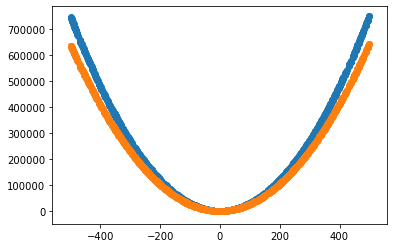

<Figure size 432x288 with 0 Axes>

In [38]:
nparray_x = np.genfromtxt('x_train.csv', delimiter = ',')
nparray_y = np.genfromtxt('y_train.csv', delimiter = ',')
a = 2.5628793873717024
b = 7.89570698805464
c = 35.69959526526627
yprime = (nparray_x**2)*a + b* nparray_x + c
plt.scatter(nparray_x, nparray_y)
plt.scatter(nparray_x, yprime)
fig = plt.figure()
print(fitness(a, b, c))

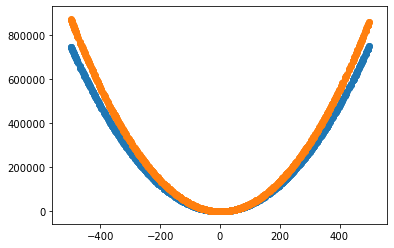

<Figure size 432x288 with 0 Axes>

In [33]:
nparray_x = np.genfromtxt('x_train.csv', delimiter = ',')
nparray_y = np.genfromtxt('y_train.csv', delimiter = ',')
a = 3.4746654944856403
b = -9.687877208205393
c = 17.821521127539818
yprime = (nparray_x**2)*a + b* nparray_x + c
plt.scatter(nparray_x, nparray_y)
plt.scatter(nparray_x, yprime)
fig = plt.figure()

In [21]:
test = [0]
test1 = test[1:len(test)]
for i in range (0, len(test1))

[]
[0]


In [25]:
float_bin(2.25)

'010.010000'

True

In [27]:
float_array(1.25, 6)

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]